In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [2]:
solargeneration = pd.read_csv('solar_generation_data.csv', sep=',')

In [3]:
windgeneration = pd.read_csv('wind_generation_data.csv', sep=',')

In [4]:
windgeneration.columns

Index(['wind speed', 'direction', 'Power Output'], dtype='object')

In [5]:
solargeneration.columns

Index(['Month ', 'Day', 'Temp Hi', 'Temp Low', 'Solar',
       'Cloud Cover Percentage', 'Rainfall in mm', 'Power Generated in MW'],
      dtype='object')

In [6]:
solargeneration = solargeneration.fillna(0)

In [31]:
col = solargeneration.loc[: , "Temp Hi":"Temp Low"]
solargeneration['temp_avg'] = col.mean(axis=1)



,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,temp_avg
0,Jan,1,109,85,30.0,9,0.0,9.93,97.0
1,Jan,2,106,71,30.1,9,0.0,9.97,88.5
2,Jan,3,106,81,29.5,9,0.0,9.77,93.5
3,Jan,4,102,83,13.0,4,0.0,4.30,92.5
4,Jan,5,105,80,30.1,9,0.0,9.97,92.5
...,...,...,...,...,...,...,...,...,...
360,Dec,27,101,83,26.4,8,0.0,8.74,92.0
361,Dec,28,102,84,25.8,8,0.0,8.54,93.0
362,Dec,29,104,83,26.9,8,0.0,8.91,93.5
363,Dec,30,105,80,25.1,8,0.0,8.31,92.5


In [7]:
windgeneration = windgeneration.fillna(0)

In [32]:
Xsolar = solargeneration[['temp_avg', 'Cloud Cover Percentage', 'Rainfall in mm']].values
Ysolar = solargeneration['Power Generated in MW'].values

In [33]:
Xwind = windgeneration[['wind speed', 'direction']].values
Ywind = windgeneration['Power Output'].values

In [51]:
windgeneration

,wind speed,direction,Power Output
0,16.00,218,34.76
1,15.91,218,36.59
2,15.82,218,32.35
3,15.73,218,39.37
4,15.64,218,33.22
...,...,...,...
361,10.59,233,40.49
362,10.36,233,34.65
363,10.12,234,39.53
364,9.87,234,32.29


In [35]:
Xsolar_train, Xsolar_test, ysolar_train, ysolar_test = train_test_split(Xsolar, Ysolar, test_size=0.25, random_state=42)

In [36]:
modelsolar = RandomForestRegressor(n_jobs=-1)

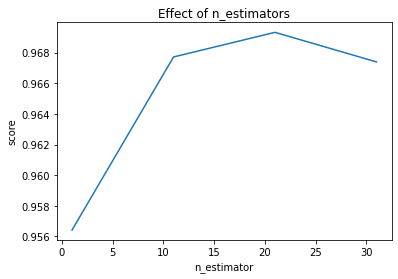

In [37]:
# Try different numbers of n_estimators or trees - this will take a minute or so
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    modelsolar.set_params(n_estimators=n)
    modelsolar.fit(Xsolar_train, ysolar_train)
    scores.append(modelsolar.score(Xsolar_test, ysolar_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [38]:
modelsolar

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [39]:
ysolar_predicted = modelsolar.predict(Xsolar_test)

In [40]:
ysolar_predicted

array([6.28401306, 3.53193548, 8.54580645, 9.57599462, 8.56516129,
       5.81709677, 8.56516129, 5.79080645, 5.74693548, 6.63807988,
       9.48401613, 9.76711828, 9.57599462, 7.39005376, 6.63807988,
       7.70695699, 9.88677419, 8.70736022, 9.42713441, 7.61032258,
       9.86758833, 5.81709677, 8.44179109, 7.40800538, 7.83980645,
       6.62806452, 6.25782949, 9.5687899 , 9.74396313, 8.49258065,
       6.36123656, 7.73991091, 9.38233871, 9.40525346, 6.09032258,
       6.57704301, 8.62365668, 8.56516129, 9.86758833, 9.42713441,
       7.12741935, 9.3722043 , 3.07096774, 9.34717089, 7.62612903,
       7.21064516, 7.23148694, 8.78870968, 8.68806452, 9.7592043 ,
       7.21064516, 9.3722043 , 8.55225806, 8.10032258, 5.59320968,
       9.39812942, 7.67630338, 4.22564516, 9.83258065, 8.39941935,
       7.49574194, 9.3722043 , 8.71352074, 9.72138249, 7.62612903,
       7.26871736, 6.69268817, 6.71978495, 6.25782949, 5.19741935,
       7.61032258, 5.64359498, 8.71352074, 6.26967742, 9.45676

In [41]:
Xwind_train, Xwind_test, ywind_train, ywind_test = train_test_split(Xwind, Ywind, test_size=0.25, random_state=42)

In [42]:
modelwind = RandomForestRegressor(n_jobs=-1)

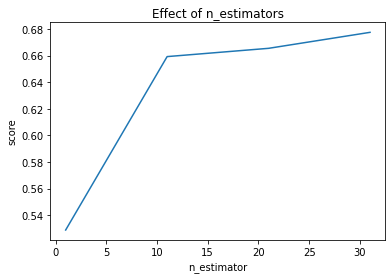

In [43]:
# Try different numbers of n_estimators or trees - this will take a minute or so
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    modelwind.set_params(n_estimators=n)
    modelwind.fit(Xwind_train, ywind_train)
    scores.append(modelwind.score(Xwind_test, ywind_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [44]:
ywind_predicted = modelwind.predict(Xwind_test)

In [45]:
exampleObj = modelsolar

fileObj = open('modelsolar.obj', 'wb')
pickle.dump(exampleObj,fileObj)
fileObj.close()

In [46]:
exampleObj = modelwind

fileObj = open('modelwind.obj', 'wb')
pickle.dump(exampleObj,fileObj)
fileObj.close()

In [47]:
score = r2_score(ysolar_test, ysolar_predicted)

In [48]:
score

0.9673914744112687

In [49]:
score = r2_score(ywind_test, ywind_predicted)

In [50]:
score

0.677572077823845

In [52]:
ywind_predicted

array([42.72741935, 32.13354839, 32.31      , 45.87741935, 31.48903226,
       40.55258065, 31.83548387, 29.78387097, 33.05516129, 29.43064516,
       41.87322581, 29.36677419, 46.54064516, 28.74483871, 28.98387097,
       46.9       , 31.45516129, 43.33032258, 39.93516129, 24.8183871 ,
       36.65516129, 33.3116129 , 27.55870968, 47.26258065, 45.34225806,
       38.53741935, 42.99193548, 48.40290323, 40.71451613, 40.24870968,
       33.33774194, 25.12774194, 29.51967742, 39.96548387, 42.74290323,
       27.87483871, 28.59677419, 33.72225806, 42.10709677, 42.30290323,
       48.08612903, 43.37290323, 33.92967742, 42.38409677, 27.8116129 ,
       46.9816129 , 27.74483871, 30.29903226, 37.99451613, 31.71387097,
       42.86483871, 40.75709677, 46.28516129, 47.83290323, 33.15709677,
       43.18483871, 29.43258065, 31.22322581, 40.28612903, 30.58709677,
       43.45967742, 40.34483871, 30.25419355, 30.95548387, 44.33451613,
       31.70451613, 41.43064516, 30.76322581, 40.77806452, 27.93

In [1]:
pip install flask_assets


  Using cached Flask_Assets-2.0-py3-none-any.whl (8.5 kB)
  Using cached webassets-2.0-py3-none-any.whl (142 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install dotenv 
